In [37]:
import numpy as np
import csv as csv
import pandas as pd
from lifelines import KaplanMeierFitter
%matplotlib inline

In [38]:
df = pd.read_csv('survival1data.csv', usecols=range(6))

In [39]:
df.head()

,patient 'id,time,"censor (1= event indicator for aids defining dx or death, 0 = censor)","treatment (1=IDV, 0 = control)",time to death (days),censor_d (1= event indicator for death only)
0,1,189,0,0,189,0
1,2,287,0,0,287,0
2,3,242,0,1,242,0
3,4,199,0,0,199,0
4,5,286,0,1,286,0


In [40]:
# Rename columns
df.columns = ['id', 'time', 'aids_indicator', 'treatment', 'ttd', 'censor']

In [41]:
# Only look at AIDS patients
df_aids = df[df['aids_indicator'] == 1]

In [42]:
# Create the lifelines object
kmf = KaplanMeierFitter()

In [43]:
# Create two groups (idv and control)
df_aids_idv = df[df['treatment'] == 1]
df_aids_control = df[df['treatment'] == 0]

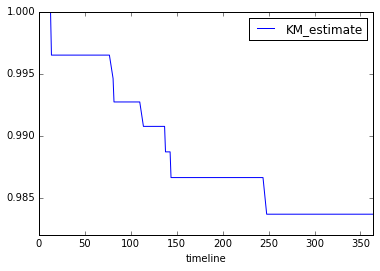

In [44]:
# Calculate and plot the population who received treatment
T = df_aids_idv["time"]
C = df_aids_idv["censor"]
kmf.fit(T, event_observed=C )
kmf.survival_function_.plot()

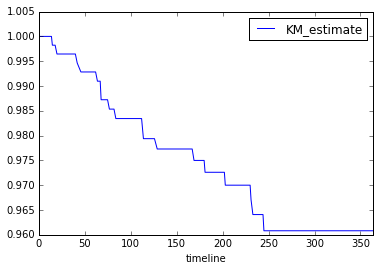

In [45]:
# Calculate and plot the control population
T = df_aids_control["time"]
C = df_aids_control["censor"]
kmf.fit(T, event_observed=C )
kmf.survival_function_.plot()